# EDA for Kaggle Dataset
Using this [Cryptocurrency Price Analysis Dataset from Kaggle](https://www.kaggle.com/datasets/adityamhaske/cryptocurrency-price-analysis-dataset/data) as proof-of-concept.

## Setup

In [1]:
# Automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
####################
# Required Modules #
####################

# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
from src.dataset import *
from src.models import *
from src.train_eval import *

c:\Users\Ryan Lee\.conda\envs\term6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare Dataset
Download the dataset from the Kaggle [page](https://www.kaggle.com/datasets/adityamhaske/cryptocurrency-price-analysis-dataset/data). Alternatively, you can use the following `kagglehub` to download the dataset:

```python
import kagglehub

# Download latest version
csv_path = kagglehub.dataset_download("adityamhaske/cryptocurrency-price-analysis-dataset")

print("Path to dataset files:", path)
```


In [4]:
# Update the path to the `crypto_combine.csv` file below:
csv_path = "data/kaggle_crypto_price_prediction/crypto_combine.csv"
df = pd.read_csv(csv_path)
df.head(10)

,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0
5,BTC,12/26/19,7218.0,7437.0,7179.0,7208.0
6,BTC,12/25/19,7255.0,7268.0,7130.0,7214.0
7,BTC,12/24/19,7328.0,7417.0,7168.0,7255.0
8,BTC,12/23/19,7420.0,7696.0,7302.0,7328.0
9,BTC,12/22/19,7145.0,7463.0,7138.0,7420.0


In [6]:
# Get summary statistics
df.describe()

,Open,High,Low,Close
count,7899.000000,7899.000000,7899.000000,7899.000000
mean,5479.620176,5623.947143,5324.149024,5480.870398
std,12010.579332,12325.039614,11665.236339,12011.567525
min,0.140000,0.150000,0.120000,0.140000
25%,12.720000,13.410000,12.405000,12.680000
50%,170.910000,176.240000,163.320000,170.890000
75%,3879.000000,3962.000000,3757.000000,3878.935000
max,67802.000000,68925.000000,66112.000000,67802.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  7899 non-null   object 
 1   Date    7899 non-null   object 
 2   Open    7899 non-null   float64
 3   High    7899 non-null   float64
 4   Low     7899 non-null   float64
 5   Close   7899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 370.4+ KB


In [ ]:
df['Crypto'].value_counts()
# 4 different crypto currency records

Crypto
ETH    1975
LTC    1975
XRP    1975
BTC    1974
Name: count, dtype: int64

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(['Crypto', 'Date'])

C:\Users\Ryan Lee\AppData\Local\Temp\ipykernel_12180\1950544961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


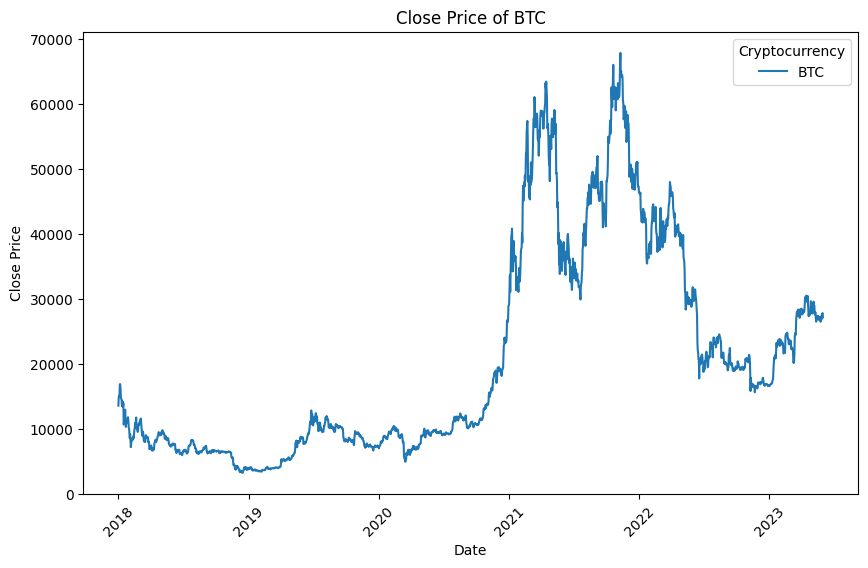

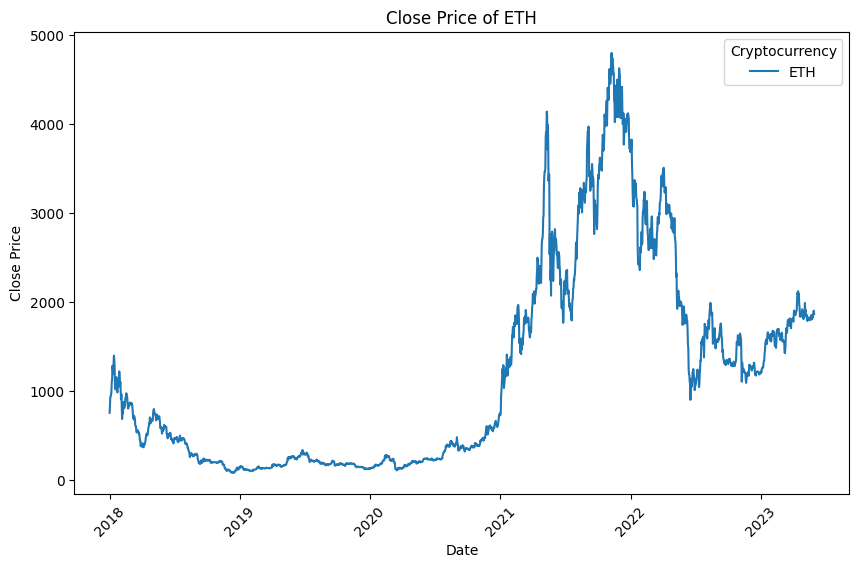

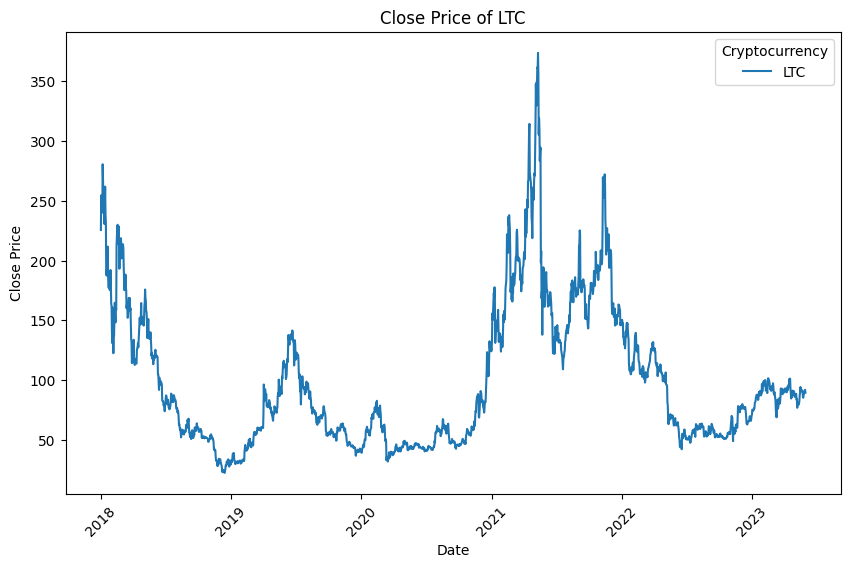

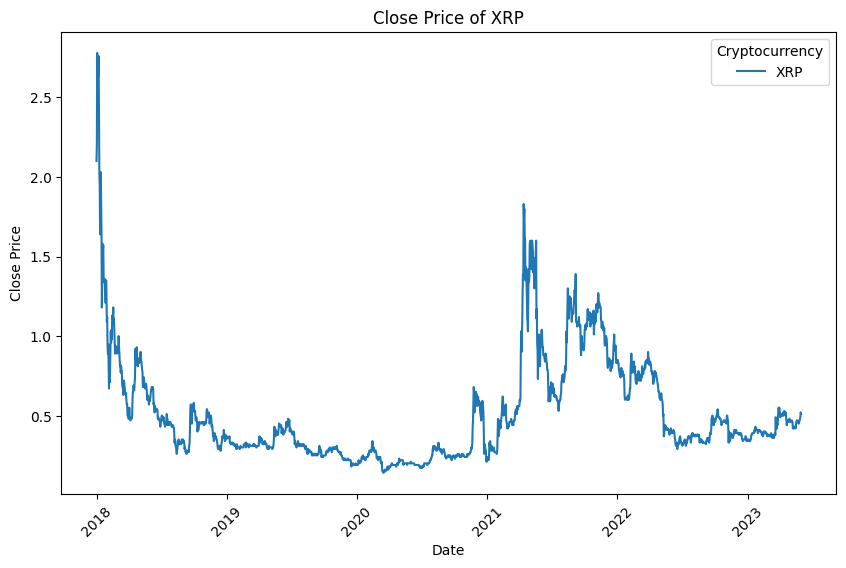

In [18]:
# Create line chart for each cryptocurrency
figs = []
for crypto, crypto_df in df.groupby('Crypto'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=crypto_df['Date'], y=crypto_df['Close'], label=crypto)
    plt.title(f"Close Price of {crypto}")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(title='Cryptocurrency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    figs.append(plt)

# Display the charts
for fig in figs:
    fig.show()

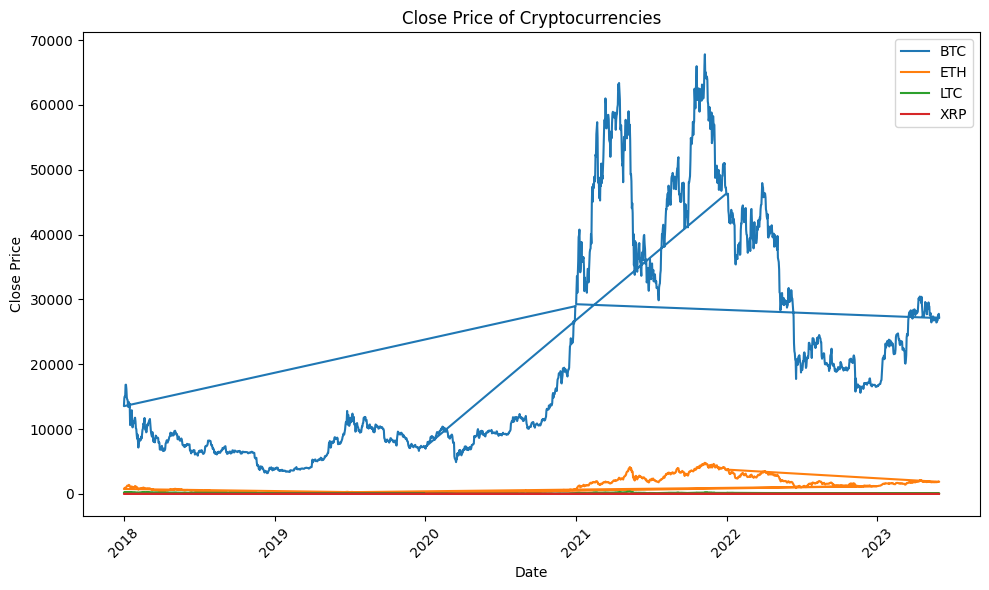

In [ ]:
# Plot all cryptos in the same graph
crypto_list = df['Crypto'].unique()
plt.figure(figsize=(10, 6))
for crypto in crypto_list:
    crypto_df = df[df['Crypto'] == crypto]
    plt.plot(crypto_df['Date'], crypto_df['Close'], label=crypto)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of Cryptocurrencies')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure layout is properly adjusted to fit labels
plt.show()